In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
df_ = pd.read_csv('/home/magody/programming/python/data_science/data/sentiments/AirlineTweets.csv')
df = df_[['airline_sentiment', 'text']].copy()
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


<AxesSubplot:>

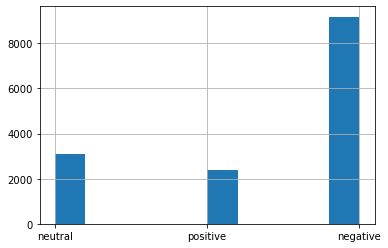

In [4]:
df['airline_sentiment'].hist()

In [6]:
df_train, df_test = train_test_split(df)
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])
Y_train = df_train['target']
Y_test = df_test['target']

In [7]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8548269581056467
Test acc: 0.7991803278688525


In [9]:
Pr_train = model.predict_proba(X_train)#[:, 1]
Pr_test = model.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))
P_train = model.predict(X_train)
P_test = model.predict(X_test)


Train AUC: 0.9430926330679194
Test AUC: 0.8953993165959516


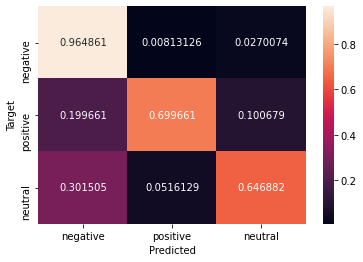

In [10]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")



cm = confusion_matrix(Y_train, P_train, normalize='true')
plot_cm(cm)

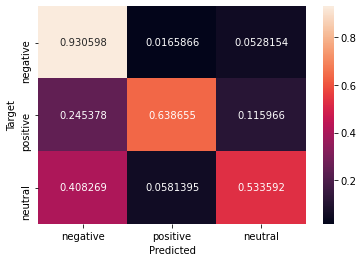

In [11]:

cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

In [13]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])
Y_train = df_b_train['target']
Y_test = df_b_test['target']
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))


Train acc: 0.9300982091276718
Test acc: 0.9147609147609148


Train AUC: 0.9790315809115082
Test AUC: 0.9533010061292087


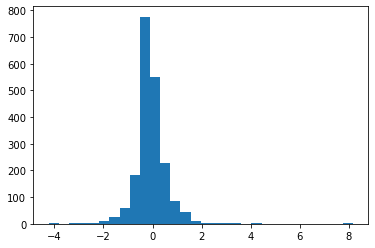

In [14]:
Pr_train = model.predict_proba(X_train)[:, 1]
Pr_test = model.predict_proba(X_test)[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))
plt.hist(model.coef_[0], bins=30);

In [15]:
word_index_map = vectorizer.vocabulary_
# let's look at the weights for each word
# try it with different threshold values!
threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

print("Most negative words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most positive words:
southwestair 2.860075665821313
thank 8.070503978065155
great 5.208733896653555
best 3.6368642824846105
virginamerica 3.2284047964512568
thx 2.808325088170174
jetblue 3.021616301804928
good 3.2615369142180777
thanks 8.157945496165814
love 4.405152711145106
appreciate 2.9299264513982246
awesome 4.054714104363999
cool 2.0881519342424273
kudos 2.6141836313842286
amazing 4.194647955735236
worries 2.7116513035089165
wonderful 2.1204124373569844
Most negative words:
hours -3.180120172892713
not -4.237871164989555
delayed -2.7045270961885732
hour -2.069684629978255
but -2.2210484580160723
cancelled -2.6770621926840525
nothing -2.0768244798540643
what -2.014376186157958
no -3.970836170289741
worst -3.190035509773291
hold -2.790231540715889
why -2.2269879895519185
luggage -2.1625444978608566
